ปฏิบัติการครั้งที่ 3 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

1. ให้เริ่มทำปฏิบัติการจาก colab notebook ที่กำหนดให้ จากนั้นบันทึกเป็นไฟล์ *.pdf

### ในปฏิบัติการนี้เราจะฝึกการทำ PCA ด้วยสองวิธี คือ
1. หาด้วยการแยกส่วนประกอบของเมทริกซ์ผ่าน numpy
2. หาด้วยการใช้เครื่องมือที่มีมาให้ใน scikit-learn

ดาวน์โหลดข้อมูลสัตว์ต่างๆ 50 ชนิดดังนี้  
ชนิดสัตว์: https://donlapark.pages.dev/229351/data/classes.txt  
ตัวแปรต่างๆ: https://donlapark.pages.dev/229351/data/predicates.txt  
ค่าของสัตว์แต่ละชนิด: https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt

In [44]:
!pip install -q wget

import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA



In [45]:
# Download the files
!wget -O classes.txt https://donlapark.pages.dev/229351/data/classes.txt
!wget -O predicate-matrix-continuous.txt https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt

--2025-07-23 13:11:31--  https://donlapark.pages.dev/229351/data/classes.txt
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 755 [text/plain]
Saving to: ‘classes.txt’

classes.txt         100%[===================>]     755  --.-KB/s    in 0s      

2025-07-23 13:11:31 (11.8 MB/s) - ‘classes.txt’ saved [755/755]

--2025-07-23 13:11:31--  https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29800 (29K) [text/plain]
Saving to: ‘predicate-matrix-continuous.txt’

predicate-matrix-co 100%[===================>]  29

In [46]:
classes = np.genfromtxt('classes.txt',dtype='str')

classes[:5]

array([['1', 'antelope'],
       ['2', 'grizzly+bear'],
       ['3', 'killer+whale'],
       ['4', 'beaver'],
       ['5', 'dalmatian']], dtype='<U15')

In [47]:
data = np.genfromtxt('predicate-matrix-continuous.txt')

data[:5,:5]

array([[-1.  , -1.  , -1.  , -1.  , 12.34],
       [39.25,  1.39,  0.  , 74.14,  3.75],
       [83.4 , 64.79,  0.  ,  0.  ,  1.25],
       [19.38,  0.  ,  0.  , 87.81,  7.5 ],
       [69.58, 73.33,  0.  ,  6.39,  0.  ]])

#### Exercise 1

ใน code block ข้างล่างนี้ จงทำ PCA บนข้อมูลที่ได้มาให้เหลือเมทริกซ์ข้อมูลที่มีตัวแปรแค่ 2 ตัว โดยใช้ฟังก์ชัน $\texttt{np.linalg.eigh}$  
ดังนั้น เมทริกซ์ที่ได้ต้องมีขนาด 50x2

$$ \Sigma =
  \begin{pmatrix}
\text{var}(X_1) & \text{cov}(X_1,X_2) & \cdots & \text{cov}(X_1,X_{85}) \\
\text{cov}(X_2,X_1) & \text{var}(X_2) & \cdots & \text{cov}(X_2,X_{85}) \\
\vdots & \vdots & \ddots & \vdots \\
\text{cov}(X_{85},X_1) & \text{cov}(X_{85},X_1) & \cdots & \text{var}(X_{85}) \\
\end{pmatrix}
 $$

In [48]:
# TODO: enter code here
# 1. Center ข้อมูล สมมติว่า data_c คือ normalized (centered) data

# 2. หา covariance matrix

# 3. Decompose the covariance matrix UDU^T

# 4. ดึง column ของ U ที่ประกอบไปด้วย eigenvector สองตัวที่มีค่า eigenvalue สูงที่สุด

# 5. เอา data_c ไปทำ projection ทิศทางของ eigenvector ใน U

# Result: a (50,2) matrix


In [49]:
data_c = np.random.rand(50,2)
np.mean(data_c, axis=0)
data_c = data_c - np.mean(data_c, axis=0)

A = np.cov(data_c, rowvar=False)

print(data_c, '<- data_c\n\n')
print(A, '<- A')

[[-0.40503029  0.5069115 ]
 [-0.29244186  0.35887773]
 [-0.18924696  0.30355255]
 [ 0.15907808  0.3287168 ]
 [ 0.33001473 -0.35385059]
 [ 0.28548246  0.17088949]
 [ 0.185175    0.16794221]
 [-0.19942606 -0.43535574]
 [-0.42943703  0.33282289]
 [-0.01794796 -0.22533679]
 [ 0.23706185  0.22022539]
 [-0.22012942 -0.11145091]
 [-0.02182445 -0.15389926]
 [ 0.11665797 -0.36307945]
 [ 0.22302503  0.39984369]
 [ 0.27103101 -0.38790988]
 [ 0.40948397 -0.33152878]
 [ 0.43275903  0.24731194]
 [-0.47899387 -0.22792828]
 [ 0.19100243 -0.33565649]
 [-0.34738104  0.09537995]
 [-0.18523171  0.21431453]
 [ 0.46081654 -0.42777966]
 [-0.34821447  0.22009873]
 [-0.04629917  0.3260467 ]
 [-0.07635693  0.40307893]
 [-0.25251821  0.02201595]
 [ 0.15685345 -0.30351182]
 [ 0.15402706  0.27755792]
 [-0.37578839  0.043331  ]
 [ 0.22524125 -0.42106334]
 [ 0.12504504  0.31790364]
 [ 0.23361619  0.44710789]
 [ 0.19119756 -0.4583007 ]
 [-0.06271699 -0.24425189]
 [-0.48903461  0.21005034]
 [-0.11412881 -0.28108142]
 

In [51]:
specA = np.linalg.eigh(A)
specA

EighResult(eigenvalues=array([0.06067996, 0.10476059]), eigenvectors=array([[-0.76220758, -0.64733269],
       [-0.64733269,  0.76220758]]))

In [52]:
D = specA[0]
U = specA[1]

print(D)
print(U)

[0.06067996 0.10476059]
[[-0.76220758 -0.64733269]
 [-0.64733269  0.76220758]]


In [53]:
diagD = np.diag(D)

print(diagD)

[[0.06067996 0.        ]
 [0.         0.10476059]]


In [54]:
l_2 = D[-1] #eigenvalue ที่มีค่าสูงที่สุด
l_3 = D[-2] #eigenvalue ที่มีค่ารองลงมา

U_23 = U[:,-2:]


print(U_23, ' <- U_2')

[[-0.76220758 -0.64733269]
 [-0.64733269  0.76220758]]  <- U_2


In [55]:
M2 = data_c @ U_23  # M คือ matrix ที่มีข้อมูลอยู่

# not U_23 @ M

print(M2)

[[-0.01942323  0.64856113]
 [-0.00941189  0.4628465 ]
 [-0.05225402  0.3538758 ]
 [-0.33403965  0.147574  ]
 [-0.02248067 -0.48333693]
 [-0.32821924 -0.05454886]
 [-0.24985627  0.00813699]
 [ 0.43382406 -0.20273644]
 [ 0.11187302  0.53166876]
 [ 0.15954794 -0.16013511]
 [-0.32324944  0.01439958]
 [ 0.23993013  0.05754825]
 [ 0.11625878 -0.1031755 ]
 [ 0.1461156  -0.35225843]
 [-0.42882326  0.1603925 ]
 [ 0.04452485 -0.47111508]
 [-0.09750237 -0.51776611]
 [-0.48994531 -0.09163603]
 [ 0.51263819  0.13633973]
 [ 0.07169791 -0.37948203]
 [ 0.2030339   0.29757042]
 [ 0.00245221  0.2832587 ]
 [-0.0743221  -0.6243585 ]
 [ 0.12293461  0.39317153]
 [-0.17577111  0.27848623]
 [-0.20272634  0.35665815]
 [ 0.17821965  0.18024402]
 [ 0.07691823 -0.33287538]
 [-0.2970729   0.11185   ]
 [ 0.25837919  0.27628732]
 [ 0.10088747 -0.46674369]
 [-0.30109969  0.16136282]
 [-0.46749159  0.18956162]
 [ 0.15094079 -0.4730887 ]
 [ 0.2059156  -0.14557188]
 [ 0.23677344  0.47667005]
 [ 0.26894303 -0.14036308]
 

#### OPTIONAL

ใน code block ข้างล่างนี้ จงทำ PCA บนข้อมูลที่ได้มาให้เหลือเมทริกซ์ข้อมูลที่มีตัวแปรแค่ 2 ตัว โดยใช้ $scikit-learn$  
พร้อมกับตรวจสอบว่าเมทริกซ์ที่ได้จากทั้งสองวิธีนี้มีค่าเท่ากัน (ต่างกันแค่ค่าบวกลบ)

In [38]:
import PCA

NameError: name 'M' is not defined

In [56]:
#TODO (optional): enter code here
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
B2 = pca.fit_transform(data_c)
print(B2)

[[ 0.64856113  0.01942323]
 [ 0.4628465   0.00941189]
 [ 0.3538758   0.05225402]
 [ 0.147574    0.33403965]
 [-0.48333693  0.02248067]
 [-0.05454886  0.32821924]
 [ 0.00813699  0.24985627]
 [-0.20273644 -0.43382406]
 [ 0.53166876 -0.11187302]
 [-0.16013511 -0.15954794]
 [ 0.01439958  0.32324944]
 [ 0.05754825 -0.23993013]
 [-0.1031755  -0.11625878]
 [-0.35225843 -0.1461156 ]
 [ 0.1603925   0.42882326]
 [-0.47111508 -0.04452485]
 [-0.51776611  0.09750237]
 [-0.09163603  0.48994531]
 [ 0.13633973 -0.51263819]
 [-0.37948203 -0.07169791]
 [ 0.29757042 -0.2030339 ]
 [ 0.2832587  -0.00245221]
 [-0.6243585   0.0743221 ]
 [ 0.39317153 -0.12293461]
 [ 0.27848623  0.17577111]
 [ 0.35665815  0.20272634]
 [ 0.18024402 -0.17821965]
 [-0.33287538 -0.07691823]
 [ 0.11185     0.2970729 ]
 [ 0.27628732 -0.25837919]
 [-0.46674369 -0.10088747]
 [ 0.16136282  0.30109969]
 [ 0.18956162  0.46749159]
 [-0.4730887  -0.15094079]
 [-0.14557188 -0.2059156 ]
 [ 0.47667005 -0.23677344]
 [-0.14036308 -0.26894303]
 

#### Exercise 2

ทำการพล็อตจุดของข้อมูลที่ได้จาก PCA ข้างบนพร้อมกับใส่คำกำกับว่าจุดไหนเป็นของสัตว์ชนิดใดโดยใช้ชื่อสัตว์จาก classes.txt

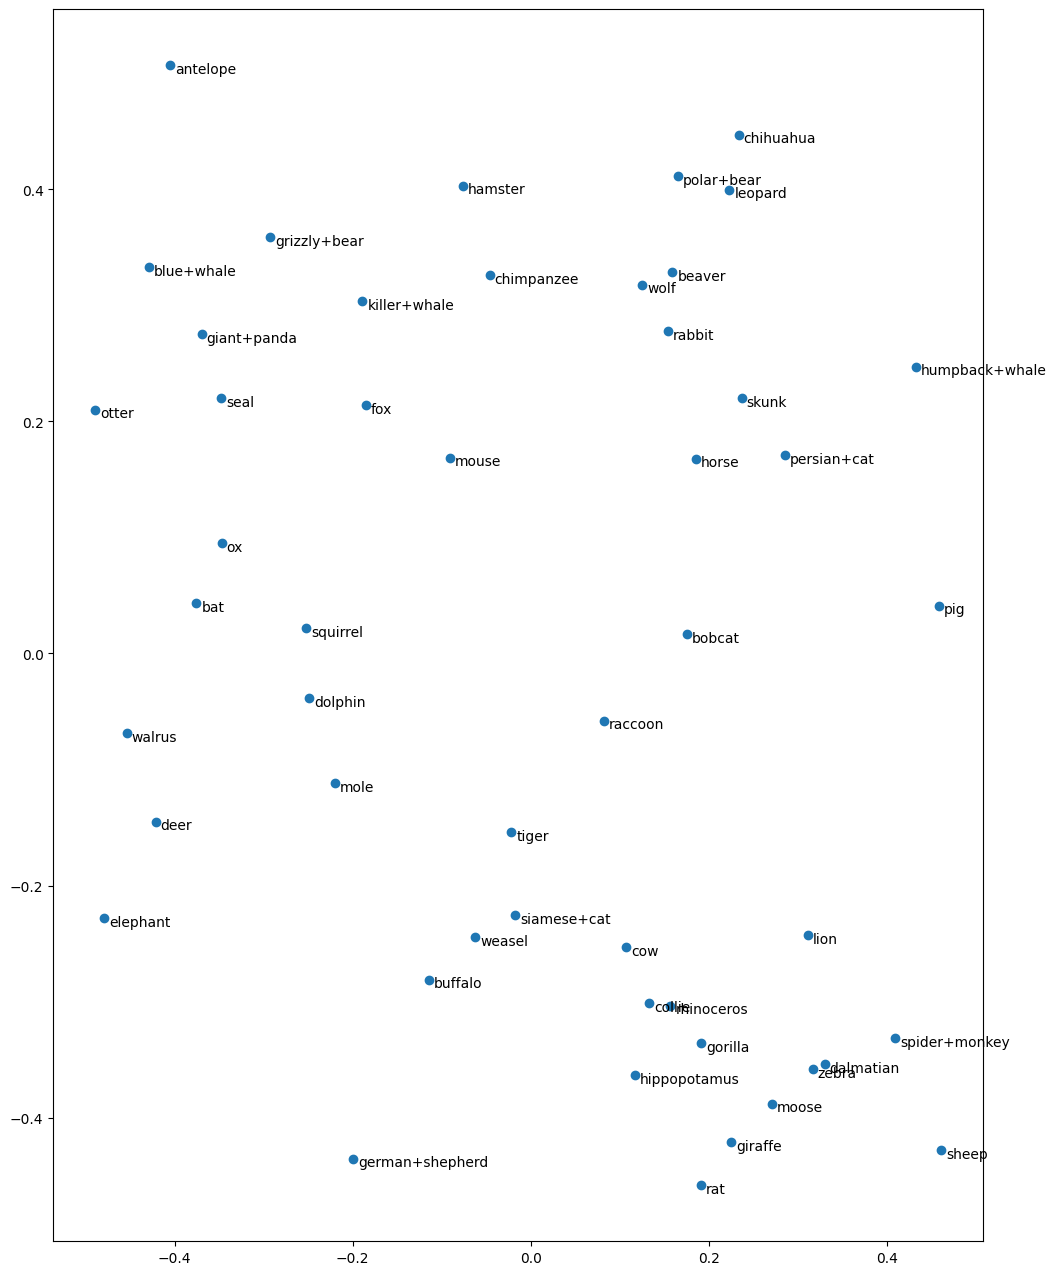

In [59]:
# กำหนดขนาดของรูป
plt.figure(figsize=(12,16))

# จงเติม argument ที่เหมาะสมในวงเล็บข้างล่างนี้
# รูปแบบของฟังก์ชันคือ plt.scatter(numpy array ของ x-coordinate, numpy array ของ y-coordinate)
plt.scatter( data_c[:,0], data_c[:,1] )

# for loop เพื่อใส่คำกำกับ (annotate) ชื่อสัตว์ของแต่ละจุด วนให้ครบสัตว์ทุกชนิดที่อยู่ใน classes
# ใส่ numpy array ที่ผ่านการทำ PCA แล้วลงในตำแหน่งที่ระบุเพื่อบอกพิกัดที่ต้องวางคำกำกับ
for i in range(50):
  plt.annotate(
          classes[i,1],
          xy=(data_c[i,0],
              data_c[i,1]),
              xytext=(5, -8),
              textcoords='offset pixels')


plt.show()

#### Exercise 3

หากลุ่มสัตว์ต่างๆ ที่อยู่ใกล้กันมา 4 กลุ่ม แล้วลองอธิบายว่าสัตว์ในแต่ละกลุ่มมีอะไรที่เหมือนกัน

1. ตัวอย่าง: กลุ่มสัตว์ที่มุมขวาบน ตัวอย่างเช่น... มีลักษณะที่เหมือนกันคือ...

2.กลุ่มสัตว์กลางถึงขวาล่าง: กลุ่มนี้มีสัตว์กินเนื้อ เสือ, สิงโต, หมีกริซลีย์, หมาป่า, แมวป่า และสัตว์ที่มีพฤติกรรมล่าหรือคุณลักษณะที่ดุร้าย

3.กลุ่มสัตว์ล่างซ้ายถึงกลางล่าง:
กลุ่มนี้มีสัตว์เลี้ยงลูกด้วยนมขนาดใหญ่หลายชนิดและเป็นสัตว์กินพืช ช้าง, กวาง, ควาย, วัว, ฮิปโปโปเตมัส, แรด, ยีราฟ

4.กลุ่มสัตว์กลางซ้าย ส่วนใหญ่เป็นสัตว์ที่อาศัยอยู่ในน้ำ หรือใกล้แหล่งน้ำ วาฬสีน้ำเงิน, นาก, แมวน้ำ, โลมา, วอลรัส
ซึ่งอาจมีลักษณะการเคลื่อนที่หรือที่อยู่คล้ายกัน